In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("data/2023/2023_finalized_data.csv") 

positions = ["QB", "TE", "RB", "WR"]
df_filtered = df[df["Position"].isin(positions)].copy()

vif_columns = [
    "Age", "Games Played", "Games Started", "Passing Attempts", "Passing Completions",
    "Passing Yards", "Passing Touchdowns", "Interceptions Thrown", "Rushing Attempts",
    "Rushing Yards", "Rushing Touchdowns", "Targets", "Receptions", "Receiving Yards",
    "Receiving Touchdowns", "Fumbles" , "XP2", "ESPN ADP", "Sleeper ADP", "NFL ADP",
    "RTSports ADP", "Average ADP", "Positional ADP"
]

df_filtered[vif_columns] = df_filtered[vif_columns].fillna(0)

X = df_filtered[vif_columns]
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 Feature         VIF
0                  const  117.825944
1                    Age    1.147959
2           Games Played    1.662958
3          Games Started    4.624021
4       Passing Attempts  687.528474
5    Passing Completions  871.560315
6          Passing Yards  192.955169
7     Passing Touchdowns   38.671928
8   Interceptions Thrown    9.730737
9       Rushing Attempts   33.312087
10         Rushing Yards   36.822314
11    Rushing Touchdowns    3.822338
12               Targets   61.215171
13            Receptions   52.457495
14       Receiving Yards   23.989159
15  Receiving Touchdowns    3.776485
16               Fumbles    3.120772
17                   XP2    1.131933
18              ESPN ADP    1.727613
19           Sleeper ADP    2.848140
20               NFL ADP    1.987579
21          RTSports ADP    2.983446
22           Average ADP    9.748826
23        Positional ADP    7.903428


In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("data/2023/2023_finalized_data.csv")  
positions = ["QB", "TE", "RB", "WR"]
df_filtered = df[df["Position"].isin(positions)].copy()

df_filtered['Total Passing'] = df['Passing Yards'] * df['Passing Touchdowns']

vif_columns = [
    "Age", "Games Played", "Games Started",
    'Total Passing',
    "Interceptions Thrown",
    #"Passing Yards", "Passing Touchdowns", 
    "Rushing Yards", "Rushing Touchdowns", "Receiving Yards",
    "Receiving Touchdowns", "Fumbles" , "XP2", "Average ADP", "Positional ADP"
]

df_filtered[vif_columns] = df_filtered[vif_columns].fillna(0)

X = df_filtered[vif_columns]
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 Feature         VIF
0                  const  100.383936
1                    Age    1.096349
2           Games Played    1.525096
3          Games Started    3.887130
4          Total Passing    3.617430
5   Interceptions Thrown    4.513103
6          Rushing Yards    4.282197
7     Rushing Touchdowns    3.643350
8        Receiving Yards    5.938710
9   Receiving Touchdowns    3.612439
10               Fumbles    2.428748
11                   XP2    1.078125
12           Average ADP    6.945705
13        Positional ADP    5.191153


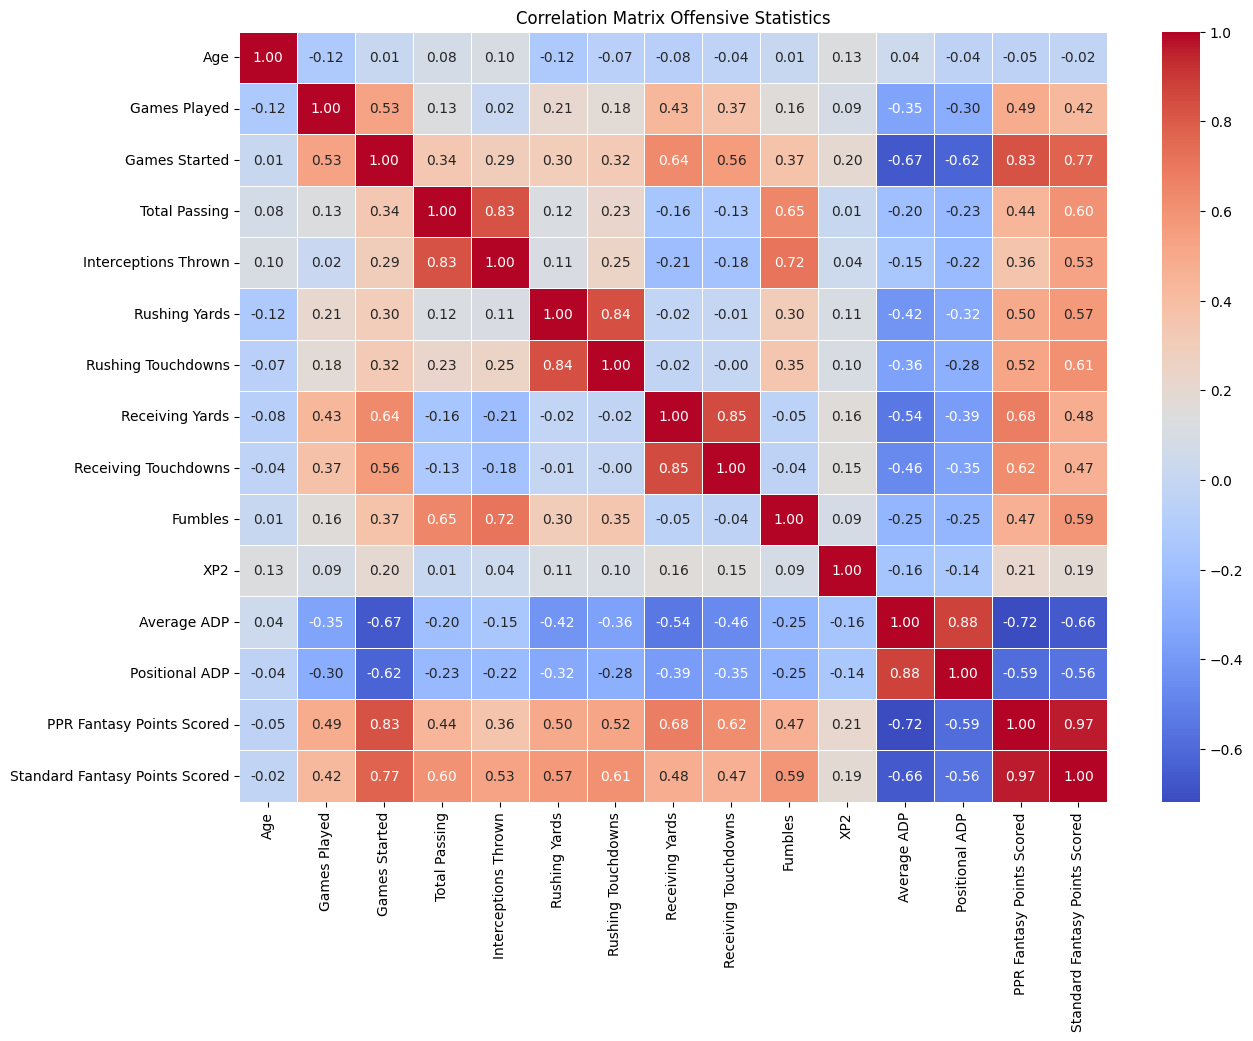

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_columns = [
    "Age", "Games Played", "Games Started",
    'Total Passing',
    "Interceptions Thrown",
    #"Passing Yards", "Passing Touchdowns", 
    "Rushing Yards", "Rushing Touchdowns", "Receiving Yards",
    "Receiving Touchdowns", "Fumbles" , "XP2", "Average ADP", "Positional ADP", "PPR Fantasy Points Scored", "Standard Fantasy Points Scored"
]

correlation_matrix = df_filtered[corr_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Offensive Statistics")
plt.show()


In [40]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_kickers = df[df["Position"] == "K"].copy()

vif_columns_kickers = [
    "Age", "Games Played", "Games Started", "Field Goals Attempted 0-39",
    "Field Goals Made 0-39", "Field Goals Attempted 40-49", "Field Goals Made 40-49",
    "Field Goals Attempted 50+", "Field Goals Made 50+", "Field Goals Attempted",
    "Field Goals Made", "Extra Points Attempted", "Extra Points Made",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP"
]

df_kickers[vif_columns_kickers] = df_kickers[vif_columns_kickers].fillna(0)

X_kickers = df_kickers[vif_columns_kickers]
X_kickers = sm.add_constant(X_kickers)  

vif_data_kickers = pd.DataFrame()
vif_data_kickers["Feature"] = X_kickers.columns
vif_data_kickers["VIF"] = [variance_inflation_factor(X_kickers.values, i) for i in range(X_kickers.shape[1])]

print(vif_data_kickers)


                        Feature         VIF
0                         const  313.227376
1                           Age    1.705098
2                  Games Played    1.869360
3                 Games Started         NaN
4    Field Goals Attempted 0-39         inf
5         Field Goals Made 0-39         inf
6   Field Goals Attempted 40-49         inf
7        Field Goals Made 40-49         inf
8     Field Goals Attempted 50+         inf
9          Field Goals Made 50+         inf
10        Field Goals Attempted         inf
11             Field Goals Made         inf
12       Extra Points Attempted  713.596869
13            Extra Points Made  717.232818
14                     ESPN ADP    6.016317
15                  Sleeper ADP    2.779596
16                      NFL ADP    2.634107
17                 RTSports ADP    2.769186
18                  Average ADP   59.638128
19               Positional ADP   72.153399


/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [41]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_kickers = df[df["Position"] == "K"].copy()

vif_columns_kickers = [
    "Age", "Games Played",
    "Field Goals Made 0-39", "Field Goals Made 40-49", "Field Goals Made 50+", "Extra Points Made", "Average ADP", "Positional ADP"
    
    #"ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP", "Field Goals Attempted"   

]

df_kickers[vif_columns_kickers] = df_kickers[vif_columns_kickers].fillna(0)

X_kickers = df_kickers[vif_columns_kickers]
X_kickers = sm.add_constant(X_kickers)  

vif_data_kickers = pd.DataFrame()
vif_data_kickers["Feature"] = X_kickers.columns
vif_data_kickers["VIF"] = [variance_inflation_factor(X_kickers.values, i) for i in range(X_kickers.shape[1])]

print(vif_data_kickers)


                  Feature         VIF
0                   const  244.298286
1                     Age    1.528034
2            Games Played    1.571984
3   Field Goals Made 0-39    6.625370
4  Field Goals Made 40-49    3.572810
5    Field Goals Made 50+    3.334639
6       Extra Points Made    6.741314
7             Average ADP   32.569968
8          Positional ADP   27.032665


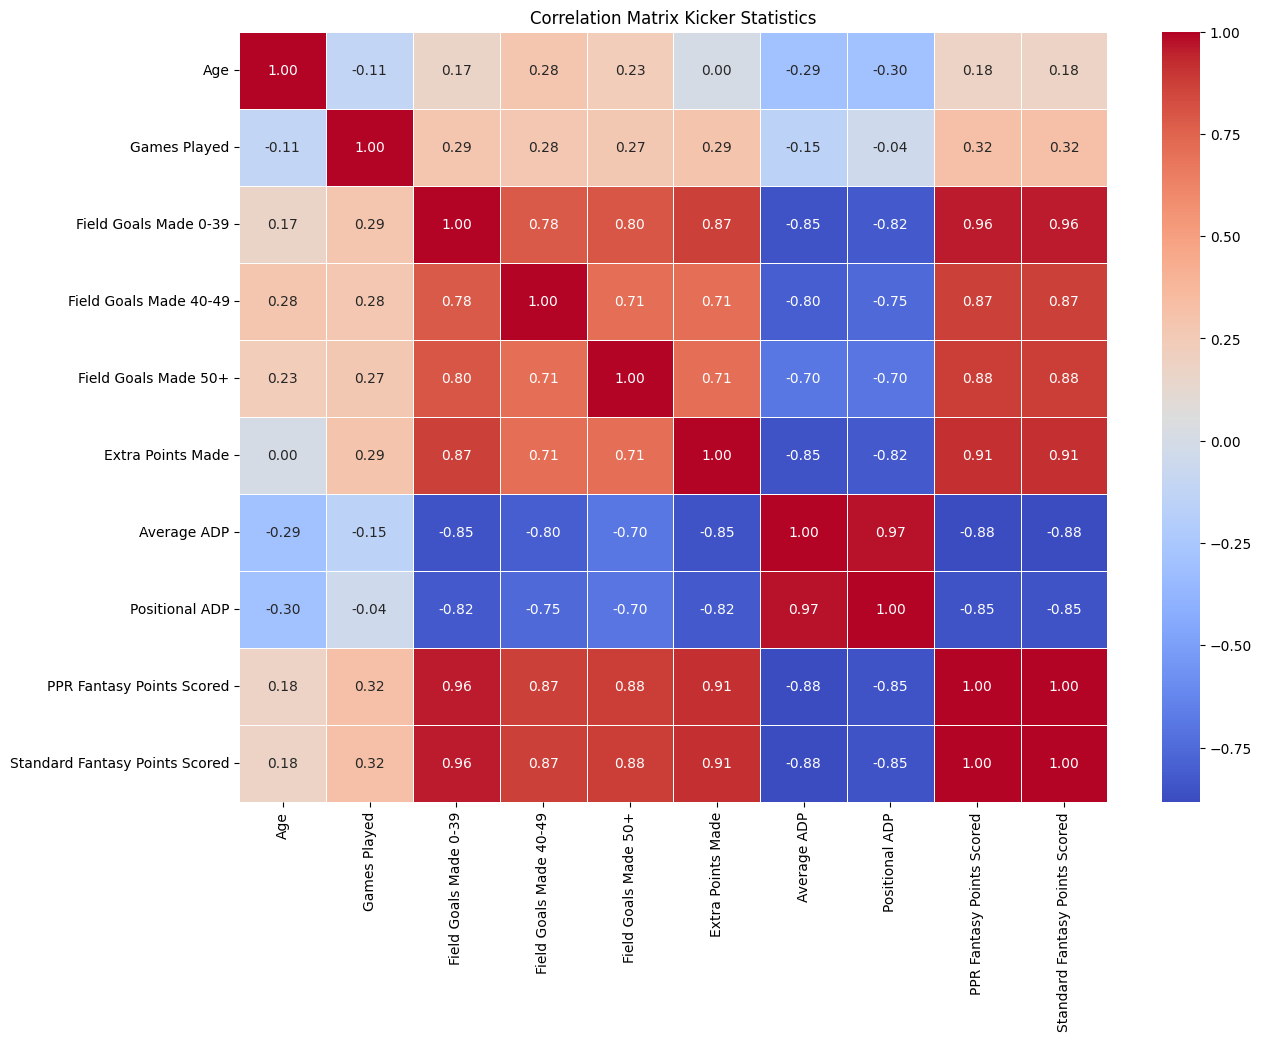

In [42]:
corr_columns_kickers = [
    "Age", "Games Played",
    "Field Goals Made 0-39", "Field Goals Made 40-49", "Field Goals Made 50+", "Extra Points Made", "Average ADP", "Positional ADP", "PPR Fantasy Points Scored", "Standard Fantasy Points Scored"
    
    #"ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP", "Field Goals Attempted"   

]

correlation_matrix_kickers = df_kickers[corr_columns_kickers].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_kickers, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Kicker Statistics")
plt.show()


In [43]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_defense = df[df["Position"] == "DEF"].copy()

vif_columns_defense = [
    "Total Yards Allowed", "Total Plays", "Takeaways", "First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", "Penalties Committed", "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", "Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", "Fantasy Points From Points",
    "Average ADP", "Positional ADP"
]

df_defense[vif_columns_defense] = df_defense[vif_columns_defense].fillna(0)

X_defense = df_defense[vif_columns_defense]
X_defense = sm.add_constant(X_defense)  

vif_data_defense = pd.DataFrame()
vif_data_defense["Feature"] = X_defense.columns
vif_data_defense["VIF"] = [variance_inflation_factor(X_defense.values, i) for i in range(X_defense.shape[1])]

print(vif_data_defense)


                        Feature          VIF
0                         const  3609.091150
1           Total Yards Allowed          inf
2                   Total Plays     9.709052
3                     Takeaways  1221.545701
4           First Downs Allowed    45.112603
5         Passing Yards Allowed          inf
6    Passing Touchdowns Allowed    18.682581
7         Rushing Yards Allowed          inf
8    Rushing Touchdowns Allowed    20.462997
9           Penalties Committed    15.405555
10                Penalty Yards    14.902318
11       First Downs by Penalty     2.841467
12     Percent Drives Scored On    21.027913
13      Percent Drives Takeaway    55.169690
14                     ST_Sacks     4.326449
15             ST_Interceptions   764.349058
16         ST_Fumble Recoveries   284.857213
17            ST_Forced Fumbles     4.395839
18                  ST_Safeties     5.110821
19  ST_Special Teams Touchdowns     2.651883
20   Fantasy Points From Points    33.268481
21        

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [44]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns



df_defense = df[df["Position"] == "DEF"].copy()

vif_columns_defense = [
    "Total Plays", 
    #"First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", 
    #"Penalties Committed", 
    "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", 
    #"Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", 
    #"Fantasy Points From Points",
    "Average ADP", 
    "Positional ADP"
]

df_defense[vif_columns_defense] = df_defense[vif_columns_defense].fillna(0)

X_defense = df_defense[vif_columns_defense]
X_defense = sm.add_constant(X_defense)  

vif_data_defense = pd.DataFrame()
vif_data_defense["Feature"] = X_defense.columns
vif_data_defense["VIF"] = [variance_inflation_factor(X_defense.values, i) for i in range(X_defense.shape[1])]

print(vif_data_defense)


                        Feature          VIF
0                         const  2095.493929
1                   Total Plays     2.866071
2         Passing Yards Allowed     6.145570
3    Passing Touchdowns Allowed     2.385295
4         Rushing Yards Allowed     4.203911
5    Rushing Touchdowns Allowed     2.517421
6                 Penalty Yards     1.508617
7        First Downs by Penalty     1.940113
8      Percent Drives Scored On     7.747516
9                      ST_Sacks     2.112799
10             ST_Interceptions     2.487943
11         ST_Fumble Recoveries     4.086303
12            ST_Forced Fumbles     3.391578
13                  ST_Safeties     1.890500
14  ST_Special Teams Touchdowns     2.136293
15                  Average ADP    35.920331
16               Positional ADP    34.009380


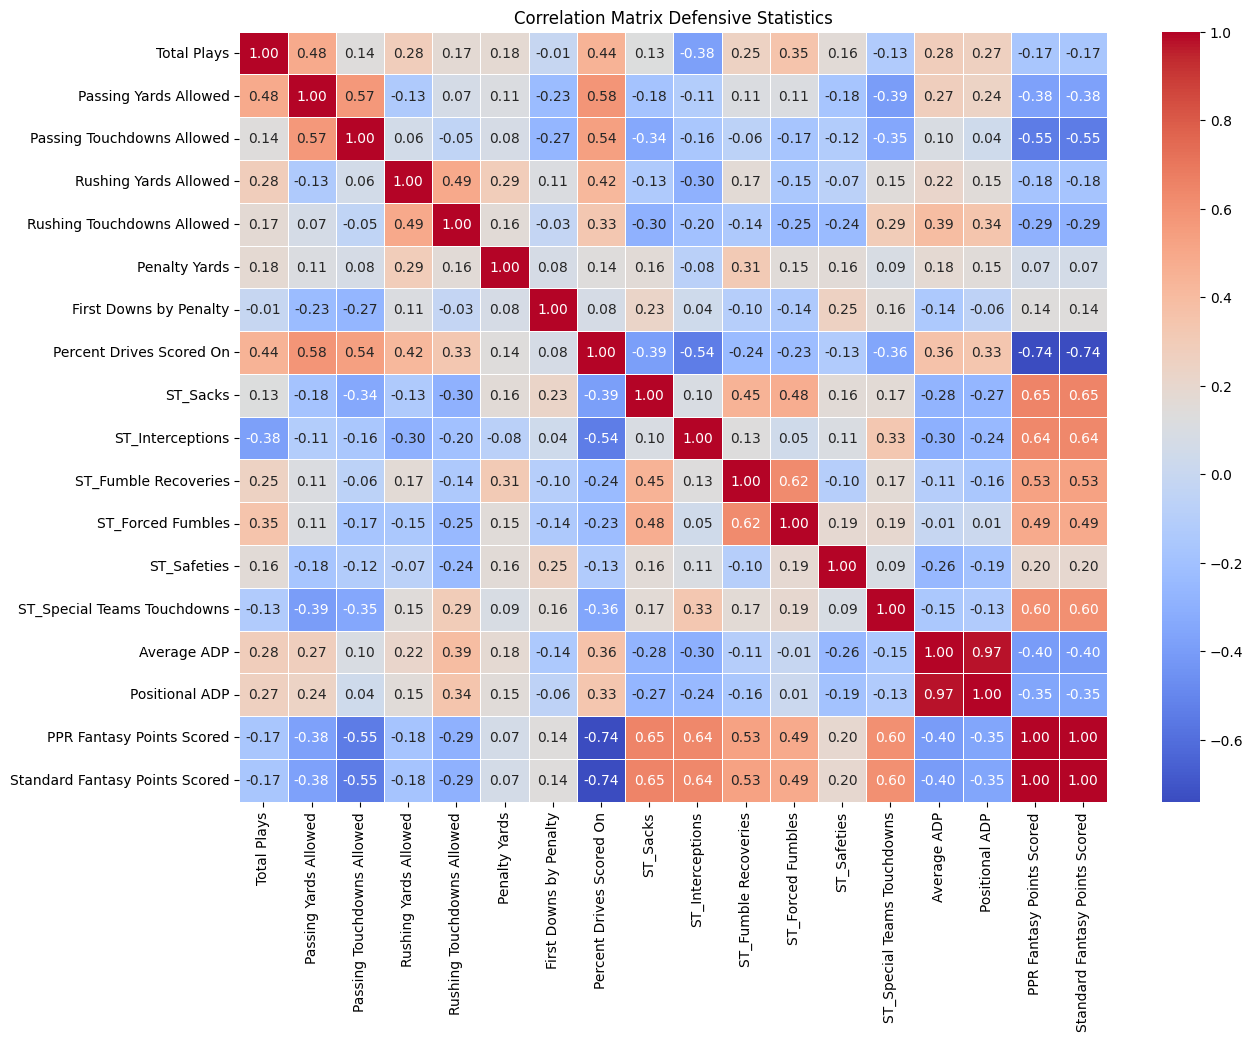

In [45]:
corr_columns_defense = [
    "Total Plays", 
    #"First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", 
    #"Penalties Committed", 
    "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", 
    #"Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", 
    #"Fantasy Points From Points",
    "Average ADP", 
    "Positional ADP", "PPR Fantasy Points Scored", "Standard Fantasy Points Scored"
]

correlation_matrix_defense = df_defense[corr_columns_defense].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_defense, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Defensive Statistics")
plt.show()


In [46]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = pd.read_csv("data/2023/2023_finalized_data.csv") 
df1['Total Passing'] = df1['Passing Yards'] * df1['Passing Touchdowns']
df1['touchdowns_allowed'] = df1['Passing Touchdowns Allowed'] + df1['Rushing Touchdowns Allowed']
df1['Receptions*Yards'] = df1['Receptions'] + df1['Receiving Yards']
df1['yards*carries'] = df1['Rushing Yards'] + df1['Rushing Attempts']




df1.drop(columns=["ESPN ADP", "RTSports ADP", "Sleeper ADP", "NFL ADP", "Rushing Attempts", "Field Goals Attempted 0-39", "Field Goals Attempted 40-49", "Field Goals Made 50+", "Field Goals Attempted 50+", "Extra Points Attempted", "Total Yards Allowed", "Passing Yards Allowed", "Rushing Yards Allowed", "ST_Fumble Recoveries", "Fantasy Points From Points", "Percent Drives Takeaway", "First Downs Allowed", "Penalties Committed", "Passing Yards", "Passing Touchdowns", "Receptions", "Passing Attempts", "Rushing Attempts", "Targets", "Team", "Player Name", "Position", "Season", "Passing Completions", "PPR Fantasy Points Scored", "Standard Fantasy Points Scored", "Field Goals Made 0-39", "Field Goals Made 40-49",  "Total Plays", "Percent Drives Scored On", "ST_Forced Fumbles", "Penalty Yards", "First Downs by Penalty", "ST_Sacks", "Passing Touchdowns Allowed", "Rushing Touchdowns Allowed", "Takeaways", "Field Goals Attempted", "Receiving Yards", "Rushing Yards"], inplace=True)
df1 = df1.fillna(0)

X = df1
X = sm.add_constant(X)  



vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)




                        Feature        VIF
0                         const  97.932341
1                           Age   4.367153
2                  Games Played   1.526764
3                 Games Started   4.938922
4          Interceptions Thrown   4.545569
5            Rushing Touchdowns   3.671828
6          Receiving Touchdowns   3.780669
7                       Fumbles   2.502693
8              Field Goals Made   7.457990
9             Extra Points Made   7.196950
10             ST_Interceptions   8.648357
11                  ST_Safeties   1.549968
12  ST_Special Teams Touchdowns   3.890207
13                          XP2   1.080440
14                  Average ADP   7.547477
15               Positional ADP   6.043302
16                Total Passing   3.622518
17           touchdowns_allowed   9.110368
18             Receptions*Yards   6.300139
19                yards*carries   4.318549
